
## 1. Data Cleaning
In the first step we need to import primary libraries which are going to be used for this assignment

In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
import html
import string
import warnings
#warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")

In [2]:
# Import Sentiment csv file
sentiment = pd.read_csv(r'C:\Users\Mostafa Kouchakzadeh\Desktop\Sentiment analysis\Sentiment.csv')
# Import Canadian elections tweets
election = pd.read_csv(r"C:\Users\Mostafa Kouchakzadeh\Desktop\Sentiment analysis\Canadian_elections_2019.csv")

In [3]:
import copy
ses = copy.deepcopy(sentiment)

In this section, we are going to perform required preprocessing for data cleaning

In [4]:
sentiment['text']=sentiment['text'].apply(str)

In [5]:
# Removing all HTML tags
election['text'] = election['text'].apply(lambda text: re.sub('<[^>]+>','', text))
sentiment['text'] = sentiment.text.apply(lambda text: re.sub('<[^>]+>','', text))
# Replace html character code with ASCII equivalent
election['text'] = election['text'].apply(lambda text: html.unescape(text))
sentiment['text'] = sentiment['text'].apply(lambda text: html.unescape(text))
# Remove all URLSs
election['text']=  election['text'].apply(lambda text: re.sub(r"http\S+", '', text, flags=re.MULTILINE) )# http matches literal characters and S+ matches all non-whitespace characters (the end of the url)
sentiment['text']=  sentiment['text'].apply(lambda text: re.sub(r"http\S+", '', text, flags=re.MULTILINE) )# http matches literal characters and S+ matches all non-whitespace characters (the end of the url)
# Make all characters in text lowercase
election['text'] = election['text'].str.lower()
sentiment['text'] = sentiment['text'].str.lower()

In this part we are going to deal with @ mention. Even though, mentioning on a tweet would have some information, but it will not give us any information about the sentiment of the sentence.

In [6]:
import re
election['text']=  election['text'].apply(lambda text: re.sub(r'@[A-Za-z0-9]+','',text) )
sentiment['text']=  sentiment['text'].apply(lambda text: re.sub(r'@[A-Za-z0-9]+','',text) )


#### Extra required data cleaning

In [7]:
#Removing the first two charachter in election tweets (i.e "b)
election['text'] = election['text'].apply(lambda text: text.replace(text,text[2:]))
# Removing single characters in the tweets
election['text']= election['text'].apply(lambda text: re.sub(r'\s+[a-zA-Z]\s+', ' ', text))
sentiment['text']= sentiment['text'].apply(lambda text: re.sub(r'\s+[a-zA-Z]\s+', ' ', text))
# Substituting multiple spaces with single space
election['text']= election['text'].apply(lambda text: re.sub(r'\s+', ' ', text, flags=re.I))
sentiment['text']= sentiment['text'].apply(lambda text: re.sub(r'\s+', ' ', text, flags=re.I))
# Remove spaces \n
election['text']= election['text'].apply(lambda text: re.sub(r'\\n+', ' ', text, flags=re.I))
sentiment['text']= sentiment['text'].apply(lambda text: re.sub(r'\\n+', ' ', text, flags=re.I))

### Tokenization 

Tokenization is the process of breaking up a sentence to a sequence of smaller parts such as words, keywords or phrases. In this part, we are going to tokenize the sentences and remove stop words from our data frame. The reason we are removing stop words is that they will not help us to understand the sentiment, which is lied inside a sentence. Based on the text file provided in this assignment, we are going to remove these stop words.

In [8]:
import os
import re
import string
!pip install emoji
import emoji
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to C:\Users\Mostafa
[nltk_data]     Kouchakzadeh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Mostafa
[nltk_data]     Kouchakzadeh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Mostafa
[nltk_data]     Kouchakzadeh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
stop_words = pd.read_csv(r'C:\Users\Mostafa Kouchakzadeh\Desktop\Sentiment analysis\stop_words.txt',header= None, prefix= 'stopwords')
stop_words_list = stop_words['stopwords0'].tolist()

In [10]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

tokenized_election = election['text'].apply(lambda x: tokenization(x.lower()))
tokenized_sentiment = sentiment['text'].apply(lambda x: tokenization(x.lower()))

In the following part, we are going to remove stop words. Stop words are usually considered as the most common words used in the language. However, there is no specific criteria to consider a word as stop word. In this assignment we were given a text file which had stop words that needed to be removed. 

In [11]:
# remove stop words
def remove_stopwords(text):
    modified_word_list=[word for word in text if word not in stop_words_list]
    return modified_word_list

election['text_cleaned']=tokenized_election.apply(remove_stopwords)
sentiment['text_cleaned']=tokenized_sentiment.apply(remove_stopwords)

There are some other world normalization techniques such as stemming. Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes.Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma. However, in this assignment for doing some exploratory analysis, we are not going to perform any of these techniques fro now. We are going to define functions that would do the procedure for us after the exploring data

In [12]:
# Define set of happy emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
 
#Function to remove emojis
def remove_emoji(text):
    return emoji.get_emoji_regexp().sub(u'', text)
 
#combine sad and happy emoticons
emoticons = emoticons_happy.union(emoticons_sad)

In [13]:
def tweet_nlp(tweet):  
    #start by tokenize the tweet (separate it the text into words, or n-grams) with nltk
    word_tokens = word_tokenize(tweet) 
 
    #convert text into lowercase
    word_tokens = [word.lower() for word in word_tokens]
 
    #remove emoticons and emojis
    word_tokens = [word for word in word_tokens if not word in emoticons]
    word_tokens = [remove_emoji(word) for word in word_tokens]
    
    #remove punctuation signs from tokens
    table = str.maketrans('', '', string.punctuation)
    word_tokens = [word.translate(table) for word in word_tokens]
    
    #remove non-alphabetic characters
    #word_tokens = [word for word in word_tokens if word.isalpha()]
    
    #remove stopwords
    #stop_words = set(stopwords.words('english')) #import a predefined set of stopwords from the nltk package
    word_tokens = [word for word in word_tokens if not word in stop_words_list]
    
    # stemming of words (remove stems)
   #from nltk.stem.porter import PorterStemmer
    #stemmer = PorterStemmer()
    #word_tokens = [stemmer.stem(word) for word in word_tokens]'''
    
    #lemmatization of words (express in base form)
    #lemmatizer = nltk.WordNetLemmatizer()
    #word_tokens = [lemmatizer.lemmatize(word) for word in word_tokens]
    
    clean_tweet = [] #create empty list to store the final tokens after text processing
    for w in word_tokens:
        clean_tweet.append(w)

    #join the tokens of the clean tweet back into a string with spaces in between
    clean_tweet_str = ' '.join(clean_tweet)
    
    #return the clean tweet string
    return clean_tweet_str

In [14]:
#Before getting to the next part, we are going to rebuild the tokenized sentences
def rejoin_words(row):
    my_list = row['text_cleaned']
    joined_words = ( " ".join(my_list))
    return joined_words

election['text_cleaned'] = election.apply(rejoin_words, axis=1)
sentiment['text_cleaned'] = sentiment.apply(rejoin_words, axis=1)

## 2. Exploratory analysis
### 2.1 Election data set
Before doing the analysis related to affiliation of a tweet to a specific political party, I want to know what is the most important reason for tweeting against a certain party. Therefore, I have decided to use cloudword to understand what are the most important reasons to criticize a party. First, we need to remove tweets that are positive.


#### Bonus

In [15]:
import copy
cloud = copy.deepcopy(election)
indexNames = cloud[cloud['sentiment'] == 'Positive' ].index
cloud.drop(indexNames , inplace=True)
indexNames = cloud[cloud['negative_reason'] == 'Others' ].index
cloud.drop(indexNames , inplace=True)

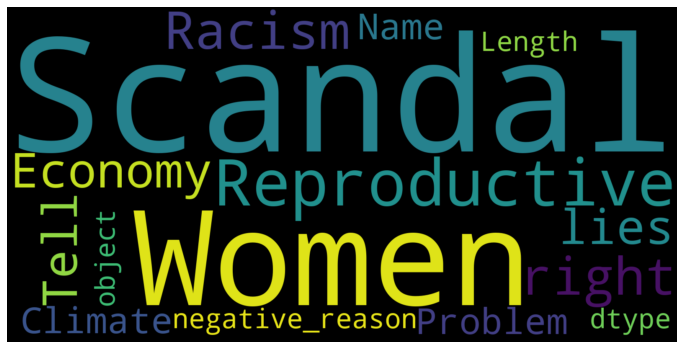

In [16]:
! pip install wordcloud
from wordcloud import WordCloud
text = str(cloud['negative_reason'])
wordcloud = WordCloud(width = 1600,height = 800, max_font_size  = 400).generate(text)
plt.figure(figsize = (12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

As we can see, the most important reason that tweets are negative is telling lies. Other reasons can be scandal, economy and so on. Therefore, we can understand that as we expected trustworthiness is the most important feature that a candidate should have to gain trust of voters. Now, we are going to see what the affiliation of a tweet is. So first, we want to determine which political party a tweet is talking about. Based on the sentiment, we are going to analyze the reason behind opposing that specific party. We now are going to define a function to look into the hashtags used in tweets. We have lists of hashtag and most common words for each of the political parties that would help us to understand what is the political party that a tweet is talking about.

In [17]:
def detect_party(x):
    words = re.findall(r"\w+", x) 
    list_liberal = ['voteliberal','istandwithtrudeau','blackface','snclavalin','trudeaumostgo','liberals','trudeau','chooseforwardwithtrudeau','chooseforward','teamtrudeau','votingliberal' ]
    list_conservative = ['conservatives','scheer4pm','cpc','andrewsheer','sheer','scheermajority','stopscheer','scheerdisaster','scheerlies','scheerhypocrisy','kinsellagate','sheerrepublican','andrew', 'conservative']
    list_NDP = ['singhupswing','jagmeet', 'singh','uprisingh','ndp','votingndp','votendp']
    if any(word in words for word in list_liberal):
        return ('Liberal')
    elif any(word in words for word in list_conservative):
        return ('Conservative')
    elif any(word in words for word in list_NDP):
        return ('NDP')
    else:
        return ('None')
            
election['political_party'] = election.apply(lambda row: detect_party(row['text_cleaned']),axis=1)

Text(0.5, 1.0, 'Political party distribution')

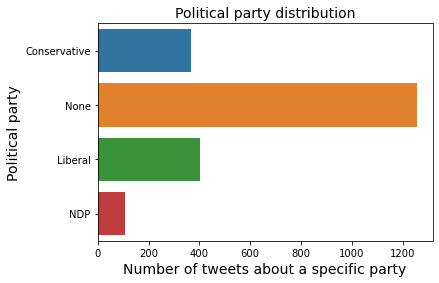

In [18]:
ax=sns.countplot(y='political_party',data = election)
ax.set_ylabel('Political party', fontsize=14)
ax.set_xlabel('Number of tweets about a specific party', fontsize=14)
ax.set_title('Political party distribution', fontsize=14)

As we can see most of the tweets did not have affiliation toward a specific party. However, between the other three, liberals and conservatives have the biggest competition, which seems to be correct. However, most of the tweets are about liberal and after that with small difference conservative tweets sit in the second place. The last one is new Democratic Party that not many tweets are talking about. Now, since we have the affiliation of each tweet, we can understand whether the tweet has a positive sentiment or negative one for a specific political party. But first, let us have a pie chart to better understand the pertenctage of each party.

In [19]:
election['political_party'].value_counts()

None            1254
Liberal          404
Conservative     366
NDP              109
Name: political_party, dtype: int64

### Bonus

If we exclude tweets with no affiliation, we would have the following pie chart:

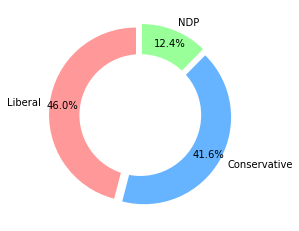

In [20]:
import matplotlib.pyplot as plt
# Pie chart
labels = [ 'Liberal', 'Conservative', 'NDP']
sizes = [404,366,109]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

As we are able to see from pie chart, Liberals have about 46 percent of tweets talking about them, almost 41.6 percent of tweets have Conservative affiliation and the remaining 12.4 percent is for New Democratic Party. We are looking into a very small number of tweets for Canadian election. From small number of samples that shown their political affiliation, we have both positive and negative sentiment for each of the political parties. Hence, we need to look at the sentiment of each political affiliation for further discussion:

Text(0.5, 1.0, 'Distribution of Political Affiliations by tweet sentiment')

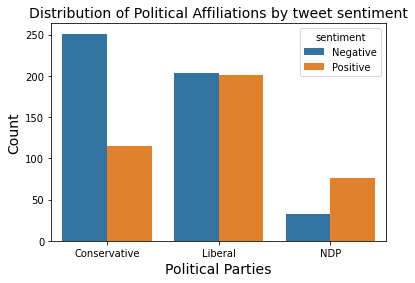

In [21]:
no_none =copy.deepcopy(election)
indexNames = no_none[no_none['political_party'] == 'None' ].index
no_none.drop(indexNames , inplace=True)
# Illustrate bar plot of tweets distributions of polical affiliations with setimnet
ax = sns.countplot(x='political_party',data=no_none, hue='sentiment')
ax.set_ylabel('Count', fontsize=14)
ax.set_xlabel('Political Parties', fontsize=14)
ax.set_title('Distribution of Political Affiliations by tweet sentiment', fontsize=14)

It is very interesting to note that Liberal party have almost the same number of tweets for positive and negative sentiment. On the other hand, the majority of tweets, almost twice, about Conservative party has a negative sentiment. At last, even though New Democratic Party has small amount of tweets associate with it, the majority of them are supportive. The result of Canadian election cannot be clearly interpreted from above shown chart due to small amount of samples that we had, mainly for Conservative party. Based on the chart, we would interpret that Conservatives would not be a tough competent for Liberal party since the majority of tweets did not have a positive sentiment, but the results of the election showed us differently. We are able to predict the result of election for NDP based on the chart. They have small number of seats in House of Commons. Number of tweets that had NDP affiliation was small but most of them were supportive.

### Bonus

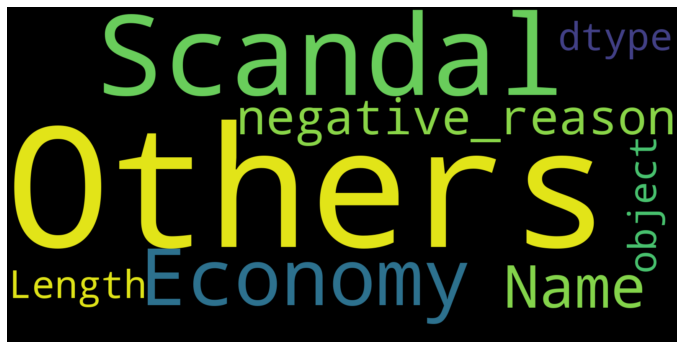

In [22]:
lib = election.loc[election['political_party'] == 'Liberal']
lib = lib.loc[lib['sentiment'] == 'Negative']
text = str(lib['negative_reason'])
wordcloud = WordCloud(width = 1600,height = 800, max_font_size  = 400).generate(text)
plt.figure(figsize = (12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

As we can see the from figure shown above, if we exclude 'Other' reason, most of the issues associated with liberal party is about telling lies and scandal. But let us look into the negative tweets about Conservatives:

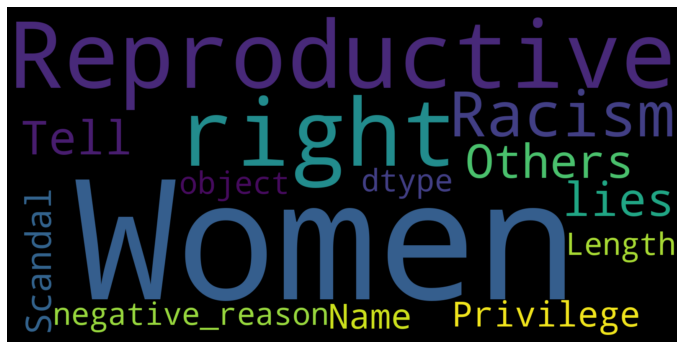

In [23]:
cons = election.loc[election['political_party'] == 'Conservative']
cons = cons.loc[cons['sentiment'] == 'Negative']
text = str(cons['negative_reason'])
wordcloud = WordCloud(width = 1600,height = 800, max_font_size  = 400).generate(text)
plt.figure(figsize = (12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

From above shown word cloud, we can realize that scandal is more frequent in tweets related to conservative party. Similar to what we saw in Liberal's case, telling lies is one of the most important reasons that people oppose conservatives. However, Women Reproductive right and Racism is more used as negative reasons for Conservatives. Let's take a look at the graphs showing the frequency of negative reasons:


Text(0.5, 1.0, 'Reason of negativity toward Liberals frequency')

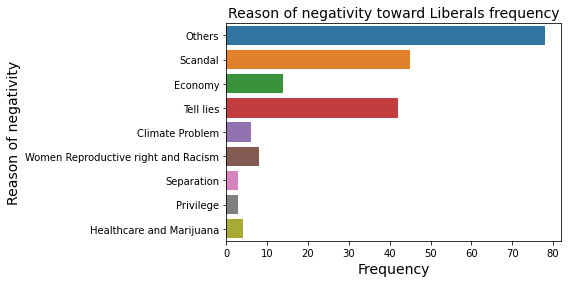

In [24]:
ax=sns.countplot(y='negative_reason',data = lib)
ax.set_ylabel('Reason of negativity', fontsize=14)
ax.set_xlabel('Frequency', fontsize=14)
ax.set_title('Reason of negativity toward Liberals frequency', fontsize=14)

Text(0.5, 1.0, 'Reason of negativity toward Conservative frequency')

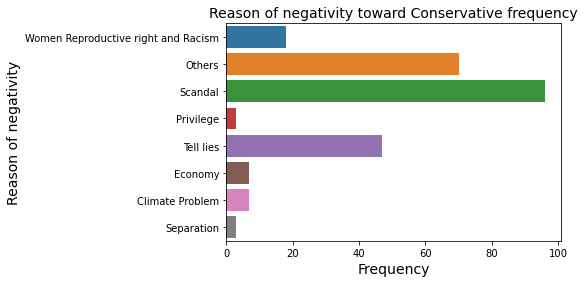

In [25]:
ax=sns.countplot(y='negative_reason',data = cons)
ax.set_ylabel('Reason of negativity', fontsize=14)
ax.set_xlabel('Frequency', fontsize=14)
ax.set_title('Reason of negativity toward Conservative frequency', fontsize=14)

As we can see from two charts shown above, negative tweets toward conservatives have less frequency in case of economy compared to what we see for liberals. On the other hand, scandal seems to be an important factor for people tweeted against conservatives. Liberals were able to perform better with respect to women's right and racism. Health care and marijuana is the only considered in case of liberal negative tweets. Which seems correct since, marijuana became legal during their government. Now, let us look at the word cloud related to positivity toward liberals and conservatives:

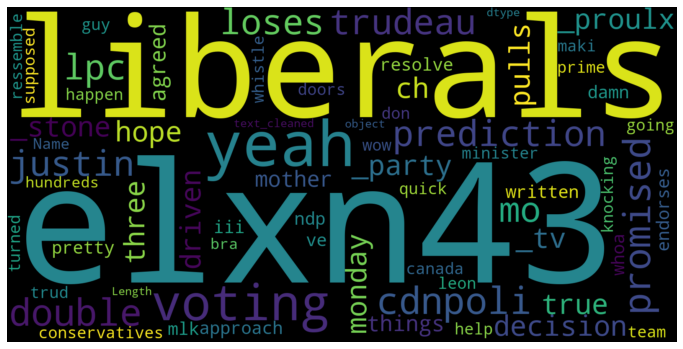

In [26]:
lib_p = election.loc[election['political_party'] == 'Liberal']
lib_p = lib_p.loc[lib_p['sentiment'] == 'Positive']
text = str(lib_p['text_cleaned'])
wordcloud = WordCloud(width = 1600,height = 800, max_font_size  = 400).generate(text)
plt.figure(figsize = (12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

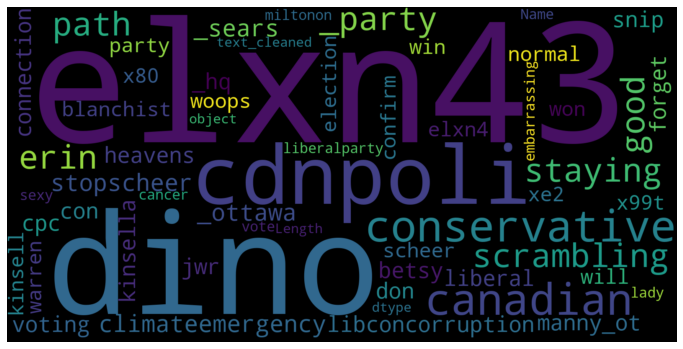

In [27]:
cons_p = election.loc[election['political_party'] == 'Conservative']
cons_p = cons_p.loc[cons_p['sentiment'] == 'Positive']
text = str(cons_p['text_cleaned'])
wordcloud = WordCloud(width = 1600,height = 800, max_font_size  = 400).generate(text)
plt.figure(figsize = (12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

As we can the most frequent hashtag used in both Liberals and conservatives, is formally the 43rd Canadian general election. Also most frequent, word used for liberals is liberal and for Conservatives is cpc.

### 2.2 General tweet data set
To do some analysis on general tweets, we are going to first start with word cloud to see what are the main words used for positive and negative tweets. 

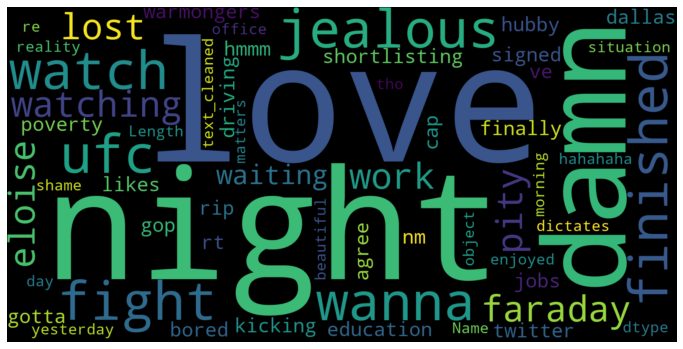

In [28]:
sen = sentiment.loc[sentiment['sentiment'] == 'Negative']
text = str(sen['text_cleaned'])
wordcloud = WordCloud(width = 1600,height = 800, max_font_size  = 400).generate(text)
plt.figure(figsize = (12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

What we can interpret from the wordcloud shown above is that in the negative sentiment tweets, in case of generic tweets, words such as nigh, work and love were repeated more than others. As we can many words such sad, ill, poor, hard and kill, which does have a negative meaning associated with them, are used frequently in the context of negative sentiments.

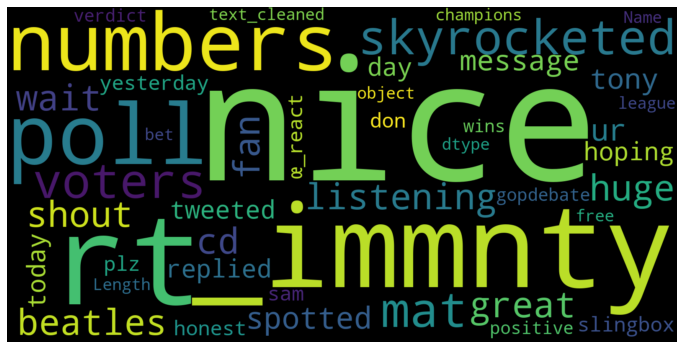

In [29]:
sen = sentiment.loc[sentiment['sentiment'] == 'Positive']
text = str(sen['text_cleaned'])
wordcloud = WordCloud(width = 1600,height = 800, max_font_size  = 400).generate(text)
plt.figure(figsize = (12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

When we take a look into positive sentiment generic tweets, we are able to see most frequent words are positive words. For instance, nice, well, love and awesome are among the words that were used repeatedly in positive tweets. As we know wordcloud is a data visulization technique which the size of the words indicates the importance and the frequency of that specific word in the text.

## 3. Model preparation
To start our model implementation, since machine learning models cannot work with simple text, we need to convert them to variables that machine-learning models can deal with them. Based on the purpose of the modeling, text features can be constructed with difeerent techniques. In the following part, we are going to use bag of words and TF-IDF. 


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, auc, mean_absolute_error
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, r2_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In the following part we are going to split the generic tweets which are cleaned to test set and training set.

In [31]:
y_generic = sentiment['sentiment']
X_generic = sentiment.text_cleaned

### Bags of words:
Bags of words is one feature to extract features from a text document, which can be used to train a machine-learning algorithm. The method works as such: it will create a vocabulary of unique words occurring in all documents of training data frame. Then, for each word, the frequency of the word in the corresponding tweet is inserted. Bag-of-Words features can be easily created using sklearn’s CountVectorizer function.


In [32]:
bow_vectorizer = CountVectorizer()
bow = bow_vectorizer.fit_transform(X_generic)
xtrain_bow, xtest_bow, ytrain, ytest = train_test_split(bow, y_generic, random_state=42, test_size=0.3)

### TF-IDF :
The other method that we are going to use in our modeling is called TF-IDF. TF-IDF is short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is also based on the frequency method but different since it takes into account the occurrence of a word not only in a single tweet but also in the whole data frame. TF-IDF works by penalizing the common words by assigning them lower weights while giving importance to words, which are rare in the entire, file but appear in good numbers in few tweets


In [33]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(X_generic)
xtrain_TFIDF, xtest_TFIDF, ytrain, ytest = train_test_split(tfidf, y_generic, random_state=42, test_size=0.3)

## 4. Model implemenation
Now, since we have the features that we want to work with and we have finished our pre-modelling stages, we are going to implement the models with different classification algorithms. Algorithms that we are going to use are as follow:

 1- Logisitic regression
 
 2- Decision Tree
 
 3- Naive bayes
 
 4- Random forest
 
 5- KNN
 
 6.Adaboost
 
 7.XGboost
 

 

In [34]:
! pip install xgboost
# Compare Algorithms
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import naive_bayes

# prepare models
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('XGBoost', XGBClassifier()))
models.append(('Decision tree', DecisionTreeClassifier()))
models.append(('Naive Bayes', naive_bayes.MultinomialNB()))
# evaluate each model in turn
for name, model in models:
    # fit model to training data
    model.fit(xtrain_bow, ytrain)
    # make predictions for test data
    y_pred = model.predict(xtest_bow)
    predictions = y_pred
    # evaluate predictions
    accuracy = accuracy_score(ytest, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))



Accuracy: 72.24%
Accuracy: 70.96%
Accuracy: 54.70%
Accuracy: 63.92%
Accuracy: 69.78%
Accuracy: 66.59%
Accuracy: 71.54%


In [92]:
accuracy_list = [['LogisticRegression',72.24],['RandomForest',70.96],['AdaBoost classifier',54.70],['KNN',63.92],['XGBoost classifier',69.78],['Decision tree',66.66],['Naive Bayes',71.54]]
print(': Model : Accuracy score (%)')
for item in accuracy_list:
    print(':',item[0],':',item[1])

: Model : Accuracy score (%)
: LogisticRegression : 72.24
: RandomForest : 70.96
: AdaBoost classifier : 54.7
: KNN : 63.92
: XGBoost classifier : 69.78
: Decision tree : 66.66
: Naive Bayes : 71.54


Thus, from above, we can realize that if we use bags of words (BOW), the highest accuracy is for logistic regression with 72.61 percent accuracy score. Now take look at the plot:

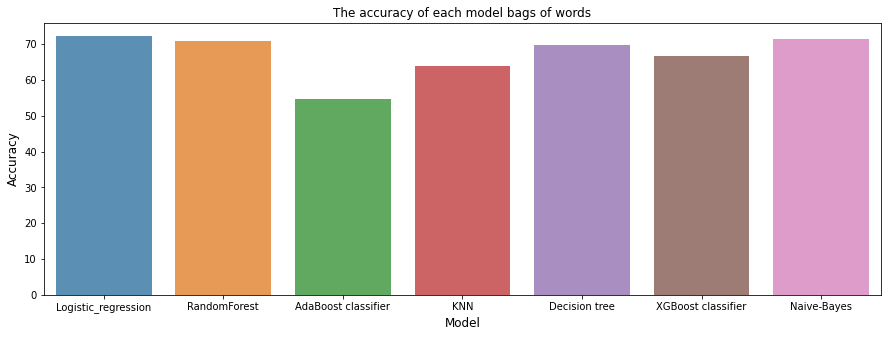

In [95]:
plt.figure(figsize=(15,5))
sns.barplot(['Logistic_regression','RandomForest','AdaBoost classifier','KNN','Decision tree','XGBoost classifier','Naive-Bayes'\
            ], [72.24,70.96,54.7,63.92,69.78,66.66,71.54], alpha=0.8)
plt.title('The accuracy of each model bags of words')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.show()

Now, we need to perfom the same procedure for TF-IDF features to see which one of these two kind of features have a higher accuracy.

In [37]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import naive_bayes

# prepare models
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('XGBoost', XGBClassifier()))
models.append(('Decision tree', DecisionTreeClassifier()))
models.append(('Naive Bayes', naive_bayes.MultinomialNB()))
# evaluate each model in turn
for name, model in models:
    # fit model to training data
    model.fit(xtrain_TFIDF, ytrain)
    # make predictions for test data
    y_pred = model.predict(xtest_TFIDF)
    predictions = y_pred
    # evaluate predictions
    accuracy = accuracy_score(ytest, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))



Accuracy: 73.09%
Accuracy: 71.83%
Accuracy: 55.99%
Accuracy: 56.96%
Accuracy: 69.39%
Accuracy: 67.33%
Accuracy: 71.12%


In [94]:
accuracy_list = [['LogisticRegression',73.09],['RandomForest',71.83],['AdaBoost classifier',55.99],['KNN',56.96],['XGBoost classifier',69.39],['Decision tree',67.33],['Naive Bayes',71.12]]
print(': Model : Accuracy score (%)')
for item in accuracy_list:
    print(':',item[0],':',item[1])

: Model : Accuracy score (%)
: LogisticRegression : 73.09
: RandomForest : 71.83
: AdaBoost classifier : 55.99
: KNN : 56.96
: XGBoost classifier : 69.39
: Decision tree : 67.33
: Naive Bayes : 71.12


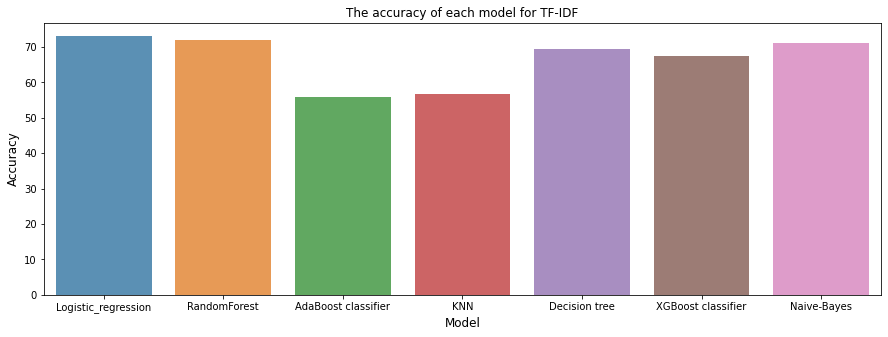

In [96]:
plt.figure(figsize=(15,5))
sns.barplot(['Logistic_regression','RandomForest','AdaBoost classifier','KNN','Decision tree','XGBoost classifier','Naive-Bayes'\
            ], [73.09,71.83,55.99,56.86,69.39,67.33,71.12], alpha=0.8)
plt.title('The accuracy of each model for TF-IDF')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.show()

Similar to what we had with bags of words features, the best model is for logestic regression. The reason might be due to the fact that we only have two catregories, negative sentiments and positive ones. Random forest and Naive bayes have an almost equal accuracy. The lowest accuracy is for AdaBoost and KNN. In the following part we are going to tune our model and see whether are able to improve the accuracy above more than 73 percent.

In [40]:
'''#Grid Search
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'solver': ['newton-cg','lbfgs','liblinear','sag'],'C':[0.001,.009,0.01,.09,.05, .01,.005, 1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'accuracy',cv=10)
grid_clf_acc.fit(xtrain_TFIDF, ytrain)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(xtest_TFIDF)
predictions =  y_pred_acc
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(ytest,predictions)))'''

"#Grid Search\nfrom sklearn.model_selection import GridSearchCV\nclf = LogisticRegression()\ngrid_values = {'solver': ['newton-cg','lbfgs','liblinear','sag'],'C':[0.001,.009,0.01,.09,.05, .01,.005, 1,5,10,25]}\ngrid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'accuracy',cv=10)\ngrid_clf_acc.fit(xtrain_TFIDF, ytrain)\n\n#Predict values based on new parameters\ny_pred_acc = grid_clf_acc.predict(xtest_TFIDF)\npredictions =  y_pred_acc\n# New Model Evaluation metrics \nprint('Accuracy Score : ' + str(accuracy_score(ytest,predictions)))"

Accuracy score is not improved and still is 73 percent. Therefore, we are going to plot learning curve as a bonus point.

##### BONUS: Based on the above models, logistic regression was found to be the best performing model with a TF-IDF set of features. Before optimizing this model, I decide to plot the learning curve based on a 10-fold cross validation approach.

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt



In [42]:
clf = LogisticRegression()

<module 'matplotlib.pyplot' from 'D:\\anaconda\\envs\\tensorflow_cpu\\lib\\site-packages\\matplotlib\\pyplot.py'>

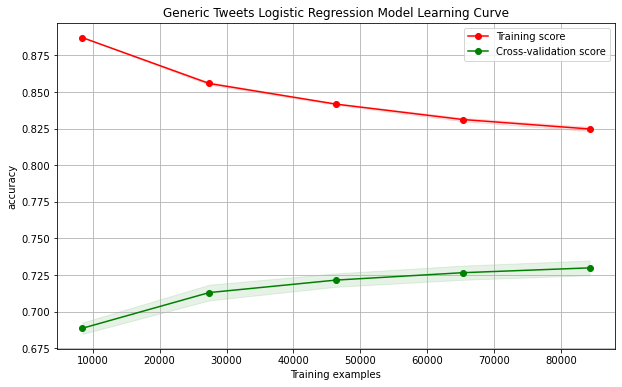

In [43]:
plot_learning_curve(clf,'Generic Tweets Logistic Regression Model Learning Curve', xtrain_TFIDF, ytrain, cv=10)

As we can see from learning curve shown above, cross validation score is approaching 73 percent. We know that an underfit model means low training score and low test score. However, an overfit model means high traning score and low test score. Our model has a high trarning score and similarly high test score. It is neither over fitted nor under fitted.

In the next part, we are going to evaluate logistic regression model based on TF-IDF features on canadian election data.

In [44]:
X= sentiment['text_cleaned']
y= sentiment['sentiment']
X_test=election['text_cleaned']
y_test=election['sentiment']

vectorizer = TfidfVectorizer(smooth_idf=True, sublinear_tf=False)
model = LogisticRegression()

X_feature = vectorizer.fit_transform(X)
X_test_feature = vectorizer.transform(X_test)
    
model.fit(X_feature, y)
predictions = model.predict(X_test_feature)
    
TN = confusion_matrix(y_test, predictions)[0][0]
FP = confusion_matrix(y_test, predictions)[0][1]
FN = confusion_matrix(y_test, predictions)[1][0]
TP = confusion_matrix(y_test, predictions)[1][1]
total = TN + FP + FN + TP

precision = TP/float(TP+FP)
recall = TP/float(TP+FN)
accuracy = (TP + TN) / float(total)

print ("This model got an accuracy of {}% on the testing set".format(round(accuracy*100,2))) 
print ("This model got a precision of {}% on the testing set".format(round(precision*100,2))) 
print ("This model got a recall of {}% on the testing set".format(round(recall*100,2)))

This model got an accuracy of 62.96% on the testing set
This model got a precision of 65.97% on the testing set
This model got a recall of 61.76% on the testing set


In [45]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_feature,y)

#
y_pred=logreg.predict(X_test_feature)

In [46]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[647, 359],
       [431, 696]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

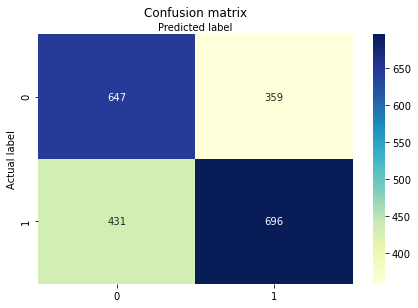

In [47]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

We can see our model is working with accuracy of almost 63 percent. As we can see from above shown confusion matrix, it is having a precision of 67 percent with 59 percent recal. For this assignment it is asked to work with accuracy as a metric. Therefore, in order to keep it consistent with the other parts, we will only considering accuracy. research has shown that certain structures of deep learnig models are more approriate for sentiment analysis in the NLP field.


In [48]:
election['predictions'] = y_pred
def prediction_check (row):
    if row['sentiment'] == row['predictions']:
        return 'Correct Predictions'
    else:
        return 'Wrong Predictions'
    
election['Prediction_check'] = election.apply(lambda row: prediction_check(row),axis=1)

Text(0.5, 1.0, 'Model Performance per political party')

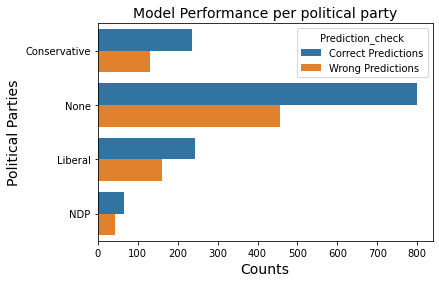

In [49]:
### Evaluate the relationship between political parties and predictions
ax=sns.countplot(y='political_party',hue='Prediction_check', data = election)
ax.set_ylabel('Political Parties', fontsize=14)
ax.set_xlabel('Counts', fontsize=14)
ax.set_title('Model Performance per political party', fontsize=14)

In [50]:
liberal = election[election['political_party']=="Liberal"]
conservative = election[election['political_party']=="Conservative"]
NDP = election[election['political_party']=="NDP"]


In [51]:
liberal.Prediction_check.value_counts()

Correct Predictions    243
Wrong Predictions      161
Name: Prediction_check, dtype: int64

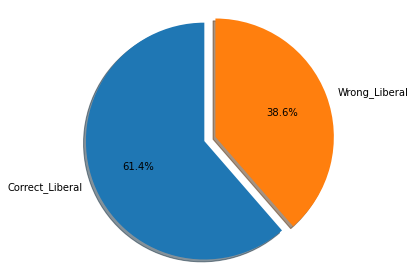

In [52]:
# Pie chart
labels = ['Correct_Liberal','Wrong_Liberal']
sizes = [248,156]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [53]:
conservative.Prediction_check.value_counts()

Correct Predictions    236
Wrong Predictions      130
Name: Prediction_check, dtype: int64

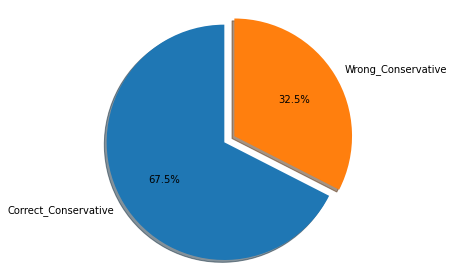

In [54]:
# Pie chart
labels = ['Correct_Conservative','Wrong_Conservative']
sizes = [247,119]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [55]:
NDP.Prediction_check.value_counts()

Correct Predictions    66
Wrong Predictions      43
Name: Prediction_check, dtype: int64

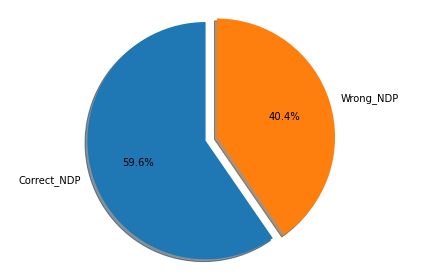

In [97]:
# Pie chart
labels = ['Correct_NDP','Wrong_NDP']
sizes = [65,44]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

As we can see from pie charts and the bar plot, the accuracy is almost more than 60 percent as we mentioned before. The total accuracy is about 63 percent. However, for different political parties this number is different as we can. This can be caused due to small number of samples in each political party. As we can see the result is more beneficial for Conservatives and Liberals and at last it is useful for New Democratic Party. However, still the result of the model is not accurate enough for each of the campaigns and need to be more optimized. Result of election shows us that the Liberals were able to achieve more seats in the House of Commons and the next party was Conservatives and at the end, NDP had the least number of seats. Nevertheless, we are seeing that Conservative tweets were able to be better detected by the model but at the end they did not have as much seats as Liberals. NLP results can be very useful for political parties during election since they can understand what are the concerns of voters and they can use those issues to gain trust. However, this model is a very simple model and also number of tweets that we were working for the election were samll and we could not expand the result of the model for total population fo Canada .The simple model structure (traditional machine learning model) used and the fact that the model is trained based on generic tweets makes this low accuracy expected. If we used deep learning models, we were able to better capture the sentiment in a tweet for each political party. As we first mentioned number of tweets with Conservative and Liberal affiliation were much higher than number of tweets with NDP. Therefore, as the result these two patries should occupy most of House of Commons seats. As we can from the results of 2019 election, Liberals were able to occupy 157 seats, Conservatives got 121 seats and as we expected NDP were only able to occupy 24 seats. Number of tweets should that NDP would not be a concern to form a government for neither of Conservative nor Liberals. However, As we saw number of tweets that had a Conservative affiliation with negative sentiment were much higher than what we had in case of Liberals. Therefore, it was fare to say that Liberals were able to win the election. Nevertheless, the results were not able to differ significantly owing to the fact that many tweets that had a Liberal affiliation were negative about the party. At the end to conclude what we have said, the result seems consistent with election's. However, due to small number of samples it is not possible for us to be sure whether NLP was useful during Canadian election.

### In the following part of this assignment, I want to build a classification model to predict the reason behind negative sentiments.
First, let us start to look what is the distribution of negative reasons with election tweets.

In [57]:
election['negative_reason'].value_counts()

Others                                 365
Scandal                                270
Tell lies                              198
Economy                                 51
Women Reproductive right and Racism     45
Climate Problem                         41
Separation                              16
Privilege                               12
Healthcare                               5
Healthcare and Marijuana                 4
Name: negative_reason, dtype: int64

Text(0.5, 1.0, 'Distribution of negative reasons')

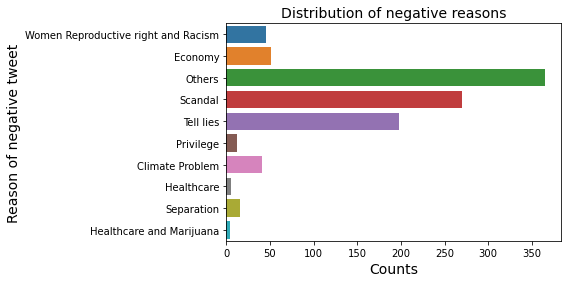

In [58]:
ax=sns.countplot(y='negative_reason',data = election)
ax.set_ylabel('Reason of negative tweet', fontsize=14)
ax.set_xlabel('Counts', fontsize=14)
ax.set_title('Distribution of negative reasons', fontsize=14)

Based on what we can see from the distribution, healthcare and marijuana in addition to privilege and seperation have the lowest number of tweets. Therefore, I have decided to add these reasons to 'Others'.

In [59]:
election['negative_reason'].replace({'Healthcare and Marijuana':'Others',\
                                              'Healthcare':'Others',\
                                              'Privilege':'Others','Separation':'Others'},inplace=True)

Text(0.5, 1.0, 'Distribution of negative reasons')

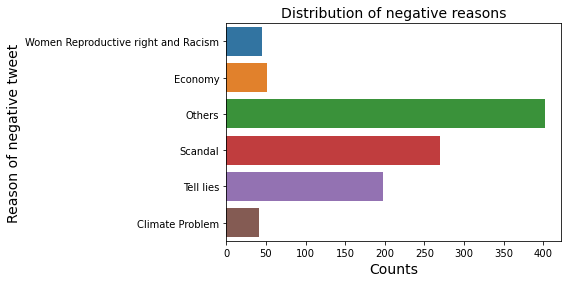

In [60]:
ax=sns.countplot(y='negative_reason',data = election)
ax.set_ylabel('Reason of negative tweet', fontsize=14)
ax.set_xlabel('Counts', fontsize=14)
ax.set_title('Distribution of negative reasons', fontsize=14)

Based on what we had from previous part, in order to use different features, I will check both kind of features meaning Bags of words and TF-IDF to see which one is working better with this kind of classification problem. In addition, I am going to use Naive bayes, Logistic regression, Random forest and decision tree algorithm for implementing the model.

In [61]:
election['negative_reason'].replace({'Others':0,'Scandal':1,'Tell lies':2, 'Economy':3,'Women Reproductive right and Racism':4, 'Climate Problem': 5},inplace=True)

In [62]:
negative = copy.deepcopy(election)

In [63]:
indexNames = negative[negative['sentiment'] == 'Positive' ].index
negative.drop(indexNames , inplace=True)

In [64]:
negative['negative_reason'].unique()

array([4., 3., 0., 1., 2., 5.])

In [65]:
y_reason = negative['negative_reason']
x_reason_tweet = negative['text_cleaned']

#### TF-IDF features

In [66]:
#Preparing TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(x_reason_tweet)
#Splitting data to test set and train set
xtrain_TFIDF, xtest_TFIDF, ytrain, ytest = train_test_split(tfidf, y_reason, random_state=42, test_size=0.3)

In [67]:
# prepare models
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Naive Bayes', naive_bayes.MultinomialNB()))
models.append(('CART', DecisionTreeClassifier()))
# evaluate each model in turn
for name, model in models:
    # fit model to training data
    model.fit(xtrain_TFIDF, ytrain)
    # make predictions for test data
    y_pred = model.predict(xtest_TFIDF)
    # evaluate predictions
    accuracy = accuracy_score(ytest, y_pred)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 55.30%
Accuracy: 57.95%
Accuracy: 49.67%
Accuracy: 46.03%


The results indicate that Logistic regression has an accuracy of almost 54 percent, Random forest has the highest accuracy of 53 percent and Naive bayes and decision tree have an accuracy of almost 50 percent. let us take a look into the learning curve.

<module 'matplotlib.pyplot' from 'D:\\anaconda\\envs\\tensorflow_cpu\\lib\\site-packages\\matplotlib\\pyplot.py'>

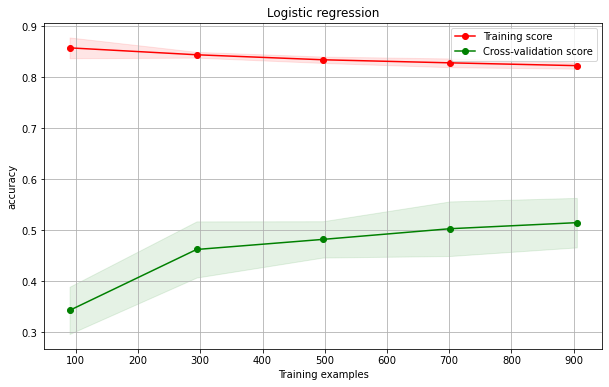

In [68]:
tf = LogisticRegression()
plot_learning_curve(tf,'Logistic regression', tfidf, y_reason, cv=10)

The results seem to have an accuracy of 50 percent on the test set but a high accuracy of almost 75 percent on the training set which is indicating that our model is over fitted.

### Bags of words features

In [69]:
bow_vectorizer = CountVectorizer()
bow = bow_vectorizer.fit_transform(x_reason_tweet)
xtrain_bow1, xtest_bow1, ytrain1, ytest1 = train_test_split(bow, y_reason, random_state=42, test_size=0.3)

In [70]:
# prepare models
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Naive Bayes', naive_bayes.MultinomialNB()))
models.append(('CART', DecisionTreeClassifier()))
# evaluate each model in turn
for name, model in models:
    # fit model to training data
    model.fit(xtrain_bow1, ytrain1)
    # make predictions for test data
    y_pred = model.predict(xtest_bow1)
    # evaluate predictions
    accuracy = accuracy_score(ytest1, y_pred)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 57.28%
Accuracy: 58.94%
Accuracy: 52.65%
Accuracy: 59.93%


Using bags of words features gives us more accuracy. As we can see the result that all of the accuracy has been increased. The highest accuracy is for decision tree. But first let us take look at the learning curve to see what is happening.

### Bonus

In [71]:
decision_tree = DecisionTreeClassifier()

<module 'matplotlib.pyplot' from 'D:\\anaconda\\envs\\tensorflow_cpu\\lib\\site-packages\\matplotlib\\pyplot.py'>

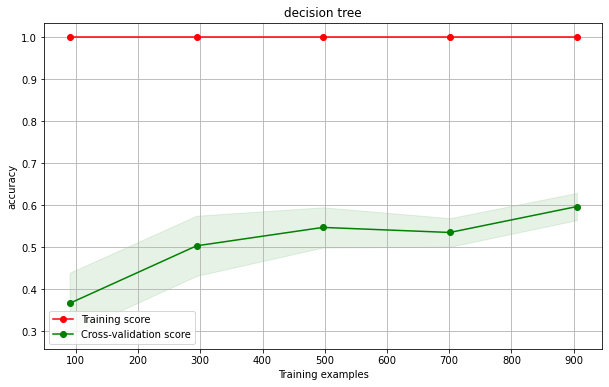

In [72]:
plot_learning_curve(decision_tree,'decision tree', bow,y_reason , cv=10)

Decision tree is heavily over fitted and is not useful for modeling compared to what we had in case TF-IDF features and logsitic regression. Nevertheless, let us check learning curve for logistic regression with bags of words features.

<module 'matplotlib.pyplot' from 'D:\\anaconda\\envs\\tensorflow_cpu\\lib\\site-packages\\matplotlib\\pyplot.py'>

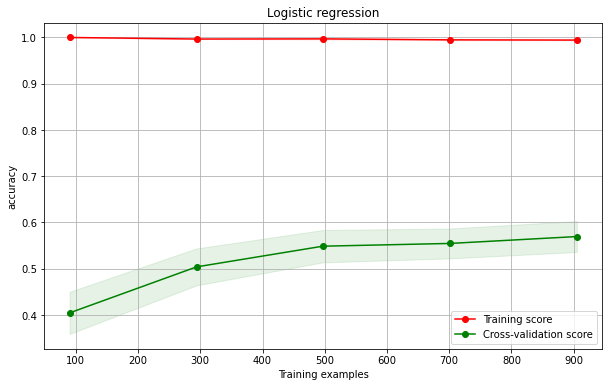

In [73]:
plot_learning_curve(tf,'Logistic regression', bow, y_reason, cv=10)

Similar to decision tree is an overfitted model and we are going to use logistic regression with TF-IDF features due to its lower variance and higher bias, even though it has lower accuracy. In general, both models are performing poorly.

### Implementing the best model for furthur analysis of prediction

In [74]:
X_train, X_test, y_train, y_test = train_test_split(x_reason_tweet,y_reason, random_state=523, test_size=0.3)

In [75]:
model = LogisticRegression()
tfidf_vectorizer = TfidfVectorizer()
X_feature = tfidf_vectorizer.fit_transform(X_train)
X_test_feature = tfidf_vectorizer.transform(X_test)
    
model.fit(X_feature, y_train)
predictions = model.predict(X_test_feature)

In [76]:
#Best model to be used
prediction_df=pd.DataFrame()
counter=0
for i in X_test.index:
    prediction_df.loc[i,'tweet']=X_test[i]
    prediction_df.loc[i,'reason']= negative['negative_reason'][i]
    prediction_df.loc[i,'prediction']=predictions[counter]
    counter+=1
prediction_df.tail()

,tweet,reason,prediction
2027,comment hire dirty work express condition trac...,1.0,1.0
1091,xe2 x80 x9cthere xe2 x80 x99s thing don xe2 x...,0.0,0.0
296,real effects coordinated attack kinsellagate p...,0.0,1.0
715,clearly questioning peoplespartyofcanada choo...,1.0,2.0
1274,conservatives claim objectivity news reporting...,1.0,0.0


In [77]:
counter=0
a=[]
for i in prediction_df.index:
    if counter<10:
        if prediction_df['reason'][i]!=prediction_df['prediction'][i]:
            print(prediction_df['tweet'][i],'. Reason: ',prediction_df['reason'][i],', Predicted:',prediction_df['prediction'][i],'\n')
            print('------------------')
            counter+=1

lot explains cpc strategy lot elxn43 cdnpoli  . Reason:  2.0 , Predicted: 0.0 

------------------
liberal party canda bastion fake progressivism elxn43 cdnpoli  . Reason:  2.0 , Predicted: 1.0 

------------------
 bcand crazy white nondisabled man speak silence disabledindigenous voices bcands compensation 120 000 159 999 travel vehicle expenses 33 043 00 silencing aboriginal disabled people deltabc elxn43  . Reason:  4.0 , Predicted: 0.0 

------------------
kind representation kingston fool fool jt full vouch guy career depended don xe2 x80 x99t climateemergency elxn43 cdnpoli singhsurge ygk  . Reason:  2.0 , Predicted: 0.0 

------------------
ck stomach watch lyingandy today press conference lying sack sh t justin 2b transparent hire pos dirty work elxn43 cdnpoli  . Reason:  2.0 , Predicted: 0.0 

------------------
keep hearing scheer plan help canadians ahead xe2 x80 xa6 canada experience cpc thinking andy plan odds benefiting average canadians plan win big lottery retire xe2 x

As we can see from the text shown above, most of the wrong prediction is related to index 0 which represents the 'Other' reason. It seems logical that the model is more likely predicting index 0 since it has the highest number of samples in the reasons for negative sentiments. If we decide to improve our model, we need to have more categories related to negative reasons. 'Other' reason can be divide into multiple separate reasons that can be better-predicted base on the words used in a tweet. Our model has high accuracy, but this accuracy would not be beneficial since it is capturing 'Other' reasons. Therefore, analysts cannot tell much from the results owing to the fact that we cannot relate much from this specific reason. Thus, to have a better model, we need to incorporate other reasons too instead of having 'Other' reasons contain most of the data. Let us take look into the learning curve.



# 5. Discussion
In the first stage of our assignment, we started to build a model based on traditional machine learning algorithm to predict the sentiment associated with generic tweets that we were provided. For our modeling both kind of features, bags of words and TF-IDF, were used and logistic regression with TF-IDF feature had the highest accuracy. The model gave us a relatively high accuracy on both training set and test set, about 73 percent. For further analysis, we tried to tune the model, however the result of accuracy remained unchanged. Subsequently, we used the optimized logistic model to predict sentiment associated with 2019 Canadian election tweets. The result of the model gave us accuracy of almost 63 percent. In order to better understand the performance of the model, based on the technique we used to find the affiliation of each tweet, we checked the accuracy of our model for each of the political parties (NDP, Liberal and Conservative). The results indicate that model's performance is higher in case of Conservative and Liberal Party, and with small difference, NDP had the lowest accuracy. As we previously mentioned, the reason that our models were not able to capture the target accurately is that we used simple and traditional machine learning algorithms. An improved model could be built by using word embedding feature creation techniques that help makes sense of sequence of words and give the computer the ability to "understand" context. These features could subsequently be tested on a deep learning model given that sufficient data is available. In fact, research has shown that certain deep learning structures are very effective in the field of NLP. In 2019 election, Liberals were able to form a minority government and Conservatives were able to gain more seat in House of Commons. Results of election tweet analysis states that most of the tweets have Liberal and Conservative affiliation if we do not consider tweets with no affiliation. Therefore, we could predict that the biggest competition would be between these two parties and NDP would only be able to have small number of seats compared to Conservatives and Liberals. Analyzing the sentiment of tweets for each of the parties, we realized that Conservatives' tweets had higher negative sentiment compared to NDP and Liberals. In case of Liberal party, the number of positive sentiment tweets and negative ones were almost equal. In addition, most of the reasons behind negative sentiment for conservatives were among 'Other' reasons. Scandal, women right, racism, and telling lies are frequently used in case conservatives. Similarly as we expected most of reasons for negative sentiment in case of Liberal tweets, were among 'Other' reasons. However, contrary to Conservatives, Economy is one of the most important issues that people have with Liberal government. Nonetheless, tweets show that people are happier with Liberal government about racism and women right. It was expected to see these results since Liberals are trying to increase the diversity of nationalities in Canada and very strict about racism and women right. All said, as we mentioned, Conservatives were able to gain as much seats as Liberals. However, based on the tweets they were not well liked by social media people. A very shallow interpretation can be that not most of Conservative voters use social media. 
In the next stage of the assignment, we tried to build a model to predict the reason behind negative sentiments. The model is not able to capture the actual result perfectly because of three main reasons. The first and most important one is that negative reasons were not appropriately categorized. Therefore, most of the reasons fell into ‘other’ category. This category is not frankly explained and we cannot tell much from the result of the model. The second reason that we need to mention is that number of samples were not quite enough, thus, the model would not be able to fit perfectly. The last but not least important reason is that the model fails to predict the correct negative reasons as the expressions used by some tweets cannot be deciphered by a TF_IDF feature encoding technique which focuses on single words. To be more specific, take this tweet for example: (b'@MartinBowRiver Do you stand with #Scheer and his dirty tricks? #NOTleadership #standforWomen #standforClimate #standforFairness #elxn43'), it was considered as ‘other’ reason however it could be categorize in case of Climate problem. It might due to the reason that TF-IDF encoding could not capture the context of stand for climate. Different machine learning methods were used and it seems that decision tree had the highest accuracy with bags of words features. Nevertheless, as we saw in the learning curve plot, the model is extremely over fitted and has a close to zero bias with significantly high variance. On the other hand, if we use logistic regression with IF-IDF features, we would have a higher bias, lower variance and slightly lower accuracy, which is much better than decision tree algorithm.


### Bonus : Word embedding for sentiment analysis
After apply word one hot encoding on words in tweets, we will end up with sparse vectors of high dimensionality. However, this might be problematic when applied on larger data set. Beside, one hot encoding does not take into account the semantic of words. Word embeddings reduce these two issues. Word embeddings are dense vectors with a much lower dimensionality. Secondly, the semantic relationships between words are reflected in the distance and direction of the vectors. In general, World Embedding represents words as dense word vectors (also called word embeddings) which are trained to understand context. Word embeddings do not understand the text as a human would, but they rather map the statistical structure of the language used in the corpus. Their aim is to map semantic meaning into a geometric space. This geometric space is then called the embedding space. To get such embedding we have 2 options, one way is to train your word embeddings during the training of the neural network. The other way is by using pretrained word embeddings (word2vec, Glove) which we can directly use in your model. There we have the option to either leave these word embeddings unchanged during training or you train them also.


In [78]:
# Packages for data preparation
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Packages for modeling
from keras import models
from keras import layers
from keras import regularizers

Using TensorFlow backend.


In [79]:
NB_WORDS = 10000  # Parameter indicating the number of words we'll put in the dictionary
VAL_SIZE = 1000  # Size of the validation set
NB_START_EPOCHS = 20  # Number of epochs we usually start to train with
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent
MAX_LEN = 24  # Maximum number of words in a sequence
GLOVE_DIM = 50  # Number of dimensions of the GloVe word embeddings

In [80]:
# useful functions that would help us during the process
def deep_model(model, X_train, y_train, X_valid, y_valid):
    '''
    Function to train a multi-class model. The number of epochs and 
    batch_size are set by the constants at the top of the
    notebook. 
    
    Parameters:
        model : model with the chosen architecture
        X_train : training features
        y_train : training target
        X_valid : validation features
        Y_valid : validation target
    Output:
        model training history
    '''
    model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
    
    history = model.fit(X_train
                       , y_train
                       , epochs=NB_START_EPOCHS
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=1)
    return history


def eval_metric(history, metric_name):
    '''
    Function to evaluate a trained model on a chosen metric. 
    Training and validation metric are plotted in a
    line chart for each epoch.
    
    Parameters:
        history : model training history
        metric_name : loss or accuracy
    Output:
        line chart with epochs of x-axis and metric on
        y-axis
    '''
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.legend()
    plt.show()

def test_model(model, X_train, y_train, X_test, y_test, epoch_stop):
    '''
    Function to test the model on new data after training it
    on the full training data with the optimal number of epochs.
    
    Parameters:
        model : trained model
        X_train : training features
        y_train : training target
        X_test : test features
        y_test : test target
        epochs : optimal number of epochs
    Output:
        test accuracy and test loss
    '''
    model.fit(X_train
              , y_train
              , epochs=epoch_stop
              , batch_size=BATCH_SIZE
              , verbose=0)
    results = model.evaluate(X_test, y_test)
    
    return results

def remove_stopwords(input_text):
    '''
    Function to remove English stopwords from a Pandas Series.
    
    Parameters:
        input_text : text to clean
    Output:
        cleaned Pandas Series 
    '''
    stopwords_list = stopwords.words('english')
    # Some words which might indicate a certain sentiment are kept via a whitelist
    whitelist = ["n't", "not", "no"]
    words = input_text.split() 
    clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
    return " ".join(clean_words) 
    
def remove_mentions(input_text):
    '''
    Function to remove mentions, preceded by @, in a Pandas Series
    
    Parameters:
        input_text : text to clean
    Output:
        cleaned Pandas Series 
    '''
    return re.sub(r'@\w+', '', input_text)

In [81]:
#Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_generic, y_generic, test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

# Train data samples: 120429
# Test data samples: 13382


In [82]:
#Converting words into numbers
tk = Tokenizer(num_words=NB_WORDS,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ")
tk.fit_on_texts(X_train)

X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

Before we can compute the word embeddings, we need to make sure the sequences are of equal length. For instance, in the example shown below, we will cut sequences to length MAX_LEN or pad them to zero to gain this. 

In [83]:
seq_lengths = X_train.apply(lambda x: len(x.split(' ')))
seq_lengths.describe()

count    120429.000000
mean          7.244542
std           3.327004
min           1.000000
25%           5.000000
50%           7.000000
75%          10.000000
max          47.000000
Name: text_cleaned, dtype: float64

Based on the figures above we will set MAX_LEN to 47. So this means we will not be truncating any words, only pad with zeros. This is to avoid to lose information as the tweets are rather short.

In [84]:
X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=MAX_LEN)
X_test_seq_trunc = pad_sequences(X_test_seq, maxlen=MAX_LEN)

In [85]:
#Converting the target classes to numbers
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

In [86]:
#Splitting off validation data
X_train_emb, X_valid_emb, y_train_emb, y_valid_emb = train_test_split(X_train_seq_trunc, y_train_oh, test_size=0.1, random_state=37)

assert X_valid_emb.shape[0] == y_valid_emb.shape[0]
assert X_train_emb.shape[0] == y_train_emb.shape[0]

print('Shape of validation set:',X_valid_emb.shape)

Shape of validation set: (12043, 24)


Keras provides an Embedding layer which helps us to train specific word embeddings based on our training data. It will convert the words in our vocabulary to multi-dimensional vectors.

In [87]:
emb_model = models.Sequential()
emb_model.add(layers.Embedding(NB_WORDS, 8, input_length=MAX_LEN))
emb_model.add(layers.Flatten())
emb_model.add(layers.Dense(3, activation='softmax'))
emb_model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 24, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 579       
Total params: 80,579
Trainable params: 80,579
Non-trainable params: 0
_________________________________________________________________


In [88]:
emb_history = deep_model(emb_model, X_train_emb, y_train_emb, X_valid_emb, y_valid_emb)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 108386 samples, validate on 12043 samples
Epoch 1/20
108386/108386 [==============================] - 1s 10us/step - loss: 0.7900 - acc: 0.5830 - val_loss: 0.6999 - val_acc: 0.6914
Epoch 2/20
108386/108386 [==============================] - 1s 8us/step - loss: 0.6409 - acc: 0.7136 - val_loss: 0.6045 - val_acc: 0.7212
Epoch 3/20
108386/108386 [==============================] - 1s 6us/step - loss: 0.5713 - acc: 0.7360 - val_loss: 0.5718 - val_acc: 0.7281
Epoch 4/20
108386/108386 [==============================] - 1s 6us/step - loss: 0.5427 - acc: 0.7476 - val_loss: 0.5620 - val_acc: 0.7324
Epoch 5/20
108386/108386 [==============================] - 1s 7us/step - loss: 0.5274 - acc: 0.7543 - val_loss: 0.5594 - val_acc: 0.7335
Epoch 6/20
108386/108386 [==============================] - 1s 7us/step - loss: 0.5168 - acc: 0.7597 - val_loss: 0.5603 - val_acc: 0.7328
Epoch 7/20
108386/10838

We have a validation accuracy of about 73%. The number of words in the tweets is rather low, so this result is rather good.

By comparing the loss values over all the epochs we can see the model is almost over fitted.

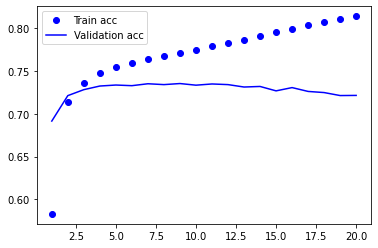

In [89]:
eval_metric(emb_history, 'acc')

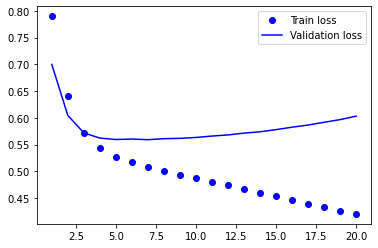

In [90]:
eval_metric(emb_history, 'loss')

In [91]:
emb_results = test_model(emb_model, X_train_seq_trunc, y_train_oh, X_test_seq_trunc, y_test_oh, 6)
print('/n')
print('Test accuracy of word embeddings model: {0:.2f}%'.format(emb_results[1]*100))

13382/13382 [==============================] - 0s 11us/step
/n
Test accuracy of word embeddings model: 70.99%


This test result is quite ok, but still not better than logstic regression which is almost 73 percent accuracy on sentiment analysis.